In [44]:
import numpy as np
from scipy.spatial import distance
import dlc_tda_ppross as dlcp
import embedding
import matplotlib.pyplot as plt
import seaborn as sns

def get_body_manif(case, dim):
    



    m_head_x=(dlcp.retrivedata(case,'headR')+dlcp.retrivedata(case, 'headL'))/2        #get bodypart signals
    m_head_y=(dlcp.retrivedata(case, 'headR.1')+dlcp.retrivedata(case, 'headL.1'))/2
    tail_x=dlcp.retrivedata(case, 'tail')
    tail_y=dlcp.retrivedata(case, 'tail.1')

    ang_bod=np.array(dlcp.angs(tail_x, tail_y, m_head_x, m_head_y))
    d_body=dlcp.smooth_diff(ang_bod)



    #dim=25
    #Shuffling
    #d_body=np.random.shuffle(d_body)
    #np.random.shuffle(d_body)



    #SVD Embedding
    embeded=embedding.l_embed(d_body,100,1)
    manif=embedding.svd_lags(embeded, dim)

    return manif



def get_head_manif(case, dim):


    m_head_x=(dlcp.retrivedata(case,'headR')+dlcp.retrivedata(case, 'headL'))/2        #get bodypart signals
    m_head_y=(dlcp.retrivedata(case, 'headR.1')+dlcp.retrivedata(case, 'headL.1'))/2

    cos_head_ang=dlcp.cos_thet_head(dlcp.retrivedata(case,'tail'),dlcp.retrivedata(case,'tail.1'),
     m_head_x,m_head_y,dlcp.retrivedata(case,'headR'),dlcp.retrivedata(case,'headR.1'),dlcp.retrivedata(case,'headL'),
     dlcp.retrivedata(case,'headL.1'))


    embeded=embedding.l_embed(cos_head_ang,100,1)
    manif=embedding.svd_lags(embeded, dim)
    return manif



def get_shuff_manif(case, dim):
    



    m_head_x=(dlcp.retrivedata(case,'headR')+dlcp.retrivedata(case, 'headL'))/2        #get bodypart signals
    m_head_y=(dlcp.retrivedata(case, 'headR.1')+dlcp.retrivedata(case, 'headL.1'))/2
    tail_x=dlcp.retrivedata(case, 'tail')
    tail_y=dlcp.retrivedata(case, 'tail.1')

    ang_bod=np.array(dlcp.angs(tail_x, tail_y, m_head_x, m_head_y))
    d_body=dlcp.smooth_diff(ang_bod)



    #dim=25
    #Shuffling
    #d_body=np.random.shuffle(d_body)
    np.random.shuffle(d_body)



    #SVD Embedding
    embeded=embedding.l_embed(d_body,100,1)
    manif=embedding.svd_lags(embeded, dim)

    return manif


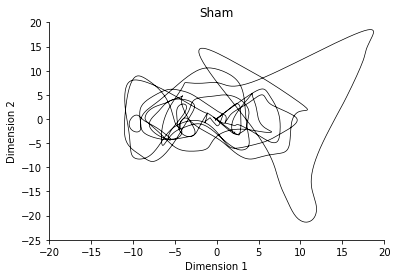

In [59]:

case='/home/morteza/dlc_projects/Analysis/Currencodes/TDA/Visualization/pilot_data/SHM21.csv'

manif=get_body_manif(case, 50)
sh_manif=get_shuff_manif(case, 50)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(manif[:3000,0],manif[:3000,1],linewidth=0.7, color='black')

ax.set_xlim(-20,20)
ax.set_ylim(-25,20)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
plt.title('Sham')
sns.despine()

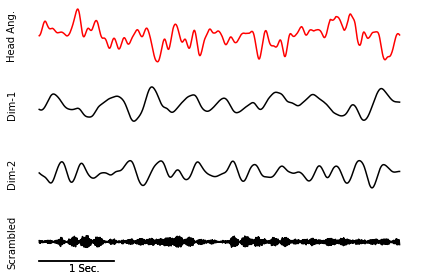

In [62]:

fig, ax=plt.subplots(4,1)

m_head_x=(dlcp.retrivedata(case,'headR')+dlcp.retrivedata(case, 'headL'))/2        #get bodypart signals
m_head_y=(dlcp.retrivedata(case, 'headR.1')+dlcp.retrivedata(case, 'headL.1'))/2
tail_x=dlcp.retrivedata(case, 'tail')
tail_y=dlcp.retrivedata(case, 'tail.1')

ang_bod=np.array(dlcp.angs(tail_x, tail_y, m_head_x, m_head_y))
d_body=dlcp.smooth_diff(ang_bod)
time=np.arange(1200)/50


ax[0].plot(d_body[:1200],linewidth=1.5,color='r', label='Body Rotational Speed')
#ax[0].set_ylim(-15,15)
ax[0].set_xticklabels([])
ax[0].set_ylabel('Head Ang.')

sns.despine(top=True, right=True, left=True, bottom=True)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].plot(manif[:1200,1],linewidth=1.5, color='black', label='Scrambled')
ax[1].set_ylim(-15,15)
ax[1].set_xticklabels([])
#ax[1].legend(frameon=False)
ax[1].set_ylabel('Dim-1')



sns.despine(top=True, right=True, left=True, bottom=True)
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].plot(time,manif[:1200,2],linewidth=1.5, color='black', label='Scrambled')
ax[2].set_ylim(-15,15)

#ax[1].legend(frameon=False)
ax[2].set_xlabel('', fontsize='large')
ax[2].set_ylabel('Dim-2')

plt.plot([0,5], [-10, -10], color='black')
plt.text(2,-15,'1 Sec.')
sns.despine(top=True, right=True, left=True, bottom=True)
ax[2].set_xticks([])
ax[2].set_yticks([])

ax[3].plot(time,sh_manif[:1200,2],linewidth=1.5, color='black', label='Scrambled')
ax[3].set_ylim(-15,15)

#ax[1].legend(frameon=False)
ax[3].set_xlabel('', fontsize='large')
ax[3].set_ylabel('Scrambled')

plt.plot([0,5], [-10, -10], color='black')
plt.text(2,-15,'1 Sec.')
sns.despine(top=True, right=True, left=True, bottom=True)
ax[3].set_xticks([])
ax[3].set_yticks([])


plt.tight_layout()
plt.savefig('manifold_timeseries.svg')

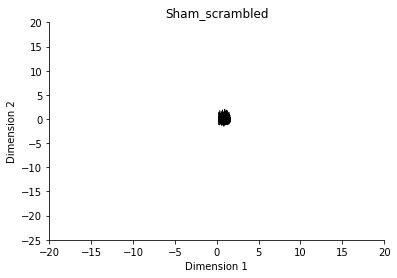

In [47]:
sh_manif=get_shuff_manif(case, 50)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(sh_manif[:300,0],sh_manif[:300,1],linewidth=0.7, color='black')

ax.set_xlim(-20,20)
ax.set_ylim(-25,20)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
plt.title('Scrambled')
sns.despine()

plt.savefig('shm_manifold.svg')

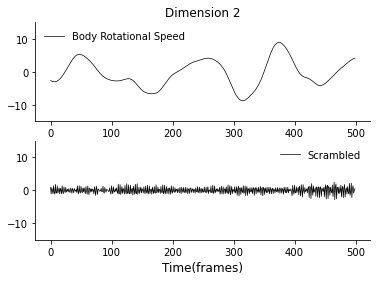

In [48]:

fig, ax=plt.subplots(2,1)

dim=1
ax[0].plot(manif[:500,dim],linewidth=.7,color='black', label='Body Rotational Speed')
ax[0].set_ylim(-15,15)
ax[0].set_title('Dimension 2', fontsize='large')

ax[0].legend(frameon=False)

ax[1].plot(sh_manif[:500,dim],linewidth=0.7, color='black', label='Scrambled')
ax[1].set_ylim(-15,15)

ax[1].legend(frameon=False)

ax[1].set_xlabel('Time(frames)', fontsize='large')
sns.despine()


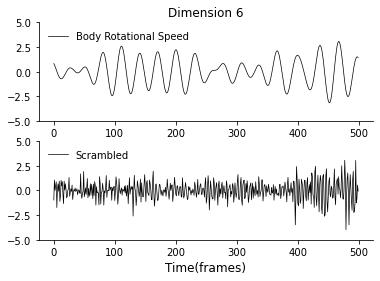

In [49]:
fig, ax=plt.subplots(2,1)

dim=7
ax[0].plot(manif[:500,dim],linewidth=.7,color='black', label='Body Rotational Speed')
ax[0].set_ylim(-5,5)
ax[0].set_title('Dimension 6', fontsize='large')

ax[0].legend(frameon=False)

ax[1].plot(sh_manif[:500,dim],linewidth=0.7, color='black', label='Scrambled')
ax[1].set_ylim(-5,5)

ax[1].legend(frameon=False)

ax[1].set_xlabel('Time(frames)', fontsize='large')
sns.despine()


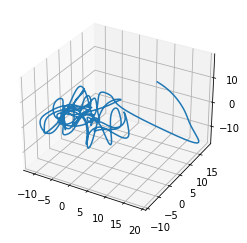

In [50]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs=manif[:2000,0],ys=manif[:2000,1],zs=manif[:2000,2],alpha=1)

In [51]:

case='/home/morteza/dlc_projects/Analysis/Currencodes/TDA/pilot_data/LES2.csv'

manif=get_body_manif(case, 50)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(manif[:3000,0],manif[:3000,1],linewidth=0.7, color='black')

ax.set_xlim(-20,20)
ax.set_ylim(-25,25)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
plt.title('Lesion')
sns.despine()

FileNotFoundError: [Errno 2] No such file or directory: '/home/morteza/dlc_projects/Analysis/Currencodes/TDA/pilot_data/LES2.csv'

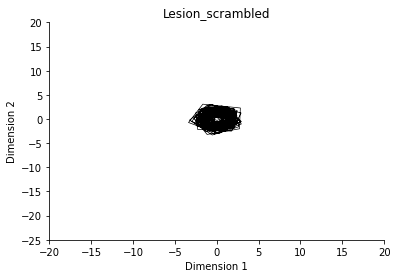

In [ ]:
sh_manif=get_shuff_manif(case, 50)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(sh_manif[:300,0],sh_manif[:300,1],linewidth=0.7, color='black')

ax.set_xlim(-20,20)
ax.set_ylim(-25,20)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
plt.title('Lesion_scrambled')
sns.despine()

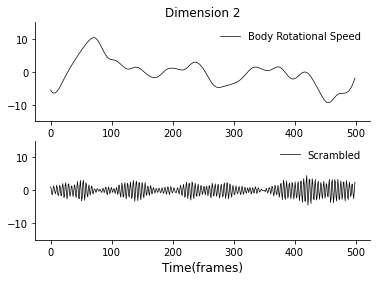

In [ ]:

fig, ax=plt.subplots(2,1)

dim=1
ax[0].plot(manif[:500,dim],linewidth=.7,color='black', label='Body Rotational Speed')
ax[0].set_ylim(-15,15)
ax[0].set_title('Dimension 2', fontsize='large')

ax[0].legend(frameon=False)

ax[1].plot(sh_manif[:500,dim],linewidth=0.7, color='black', label='Scrambled')
ax[1].set_ylim(-15,15)

ax[1].legend(frameon=False)

ax[1].set_xlabel('Time(frames)', fontsize='large')
sns.despine()

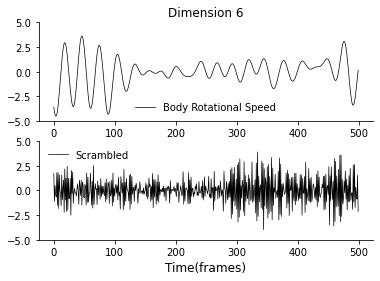

In [ ]:
fig, ax=plt.subplots(2,1)

dim=7
ax[0].plot(manif[:500,dim],linewidth=.7,color='black', label='Body Rotational Speed')
ax[0].set_ylim(-5,5)
ax[0].set_title('Dimension 6', fontsize='large')

ax[0].legend(frameon=False)

ax[1].plot(sh_manif[:500,dim],linewidth=0.7, color='black', label='Scrambled')
ax[1].set_ylim(-5,5)

ax[1].legend(frameon=False)

ax[1].set_xlabel('Time(frames)', fontsize='large')
sns.despine()